In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

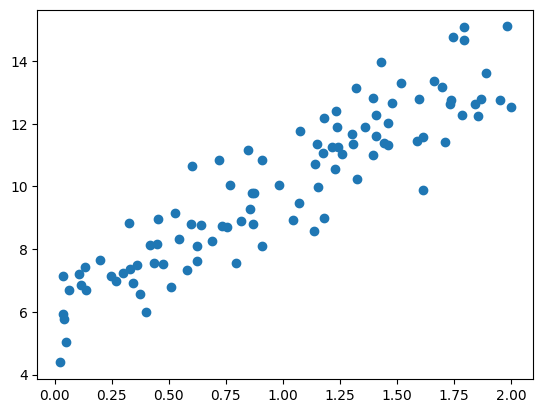

In [3]:
np.random.seed(0)

# y = 4x + 6 + Noise
noise = np.random.randn(100,1)
X = 2 * np.random.rand(100,1)
y = 6 + 4*X + noise

plt.scatter(X,y)
plt.show()

####    배치 경사 하강법

In [13]:
# 비용 함수
def get_cost(y, y_hat):
    n = len(y) 
    cost = np.sum( np.square(y - y_hat) ) / n
    # cost = (np.sqrt(y - y_hat)).mean()
    return cost

# Batch Gradient Descent
def batch_gradient_descent(b1, b0, X, y, learning_rate = 0.01, iters = 10000):
    n = len(y)
    
    for i in range(iters):
        final_iters = i + 1
        # 예측값 nx1
        y_hat = b0 + b1*X

        # 비용 함수(RSS)
        cost0 = np.sum( np.square(y - y_hat) ) / n
        # cost0 = (np.sqrt(y - y_hat)).mean()
        
        # 학습률 * 편미분
        b1_update = learning_rate * -(2/n) * X.T @ (y - y_hat)
        b0_update = learning_rate * -(2/n) * np.sum(y - y_hat)

        # 파라미터 업데이트
        b1 = b1 - b1_update
        b0 = b0 - b0_update
        
        # 업데이트 후 비용 함수(RSS)
        y_hat = b0 + b1*X
        cost1 = np.sum( np.square(y - y_hat) ) / n
        
        # 비용 감소가 0.00001보다 작은 경우 stop
        if cost0 - cost1 < 0.00001:
            break
        
    return b1, b0, final_iters

In [14]:
b1, b0, final_iters = batch_gradient_descent(0, 0, X, y, learning_rate = 0.01, iters=1000)

y_hat = b0 + b1[0,0]*X
cost = get_cost(y, y_hat)

print(f"b1: {b1[0,0]:.3f}, b0: {b0:.3f}, iteration: {final_iters}")
print(f"Gradient Descent Total Cost: {cost:.4f}")

b1: 4.030, b0: 6.018, iteration: 989
Gradient Descent Total Cost: 1.0170
